# MODEL DESCRIPTION

**WHO?**: Myself as a reader

**WHAT?**: A model to identify text sentiment. 

**WHY?**:If one nows the sentiment of a text quickly, I don't have to read the entire text to do the classification.

**==> STORY**: As a reader, I want a tool to analyze if a text corresponds to positive or negative sentiment, so that I don't have to read the entire review to do the classification.

**Methods**: Use Keras/TensorFlow to build and train a neural network that analyzes text for sentiment. In order to train a neural network, you need data to train it with. Rather than download an external dataset, you'll use the IMDB movie reviews sentiment classification dataset that's included with Keras. The IMDB dataset contains 50,000 movie reviews that have been individually scored as positive (1) or negative (0). The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing. The sentiment that's expressed in these reviews is the basis for which your neural network will analyze text presented to it and score it for sentiment.

Reference: https://docs.microsoft.com/en-us/learn/modules/analyze-review-sentiment-with-keras/2-build-and-train-a-neural-network

The IMDB dataset is one of several useful datasets included with Keras. For a complete list of built-in datasets, see https://keras.io/datasets/.

Created by Edwin Campos on March 27, 2020

Last modification by ecampos.phd@gmail.com on 2020.Mar.30

### Ingest the data

In [5]:
#from keras.datasets import imdb
from tensorflow.keras.datasets import imdb

In [6]:
# Import dataset from Amazon Web Services
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 2s 0us/step


This code loads the IMDB dataset that's included with Keras and creates a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. Each word is assigned a unique integer. The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on. load_data also returns a pair of tuples containing the movie reviews (in this example, x_train and x_test) and the 1s and 0s classifying those reviews as positive and negative (y_train and y_test).

The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers. Specifically, you train it with tensors. In this case, each review is a 1-dimensional tensor (think of a 1-dimensional array) containing integers identifying the words contained in the review. To demonstrate, type the following Python statement into an empty cell and execute it to see the integers representing the first review in the training set:

In [7]:
# Integers comprising the first review in the IMDB training set
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

The first number in the list — 1 — doesn't represent a word at all. It marks the start of the review and is the same for every review in the dataset. The numbers 0 and 2 are reserved as well, and you subtract 3 from the other numbers to map an integer in a review to the corresponding integer in the dictionary. 

The second number — 14 — references the word that corresponds to the number 11 in the dictionary.

The third number represents the word assigned the number 19 in the dictionary, and so on.

In [8]:
# Dictionary mapping words to integers
imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Note that each review in the dataset is encoded as a collection of integers rather than words. 

It is possible to reverse-encode a review so one can see the original text that comprised it: 

In [10]:
# The first review in textual format
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

The reviews are "clean" in the sense that letters have been converted to lowercase and punctuation characters removed. But they are not ready to train a neural network to analyze text for sentiment. When you train a neural network with collection of tensors, each tensor needs to be the same length. At present, the lists representing reviews in x_train and x_test have varying lengths.

Fortunately, TensorFlow.Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s. Enter the following code into the notebook and run it to force all the lists representing movie reviews in x_train and x_test to a length of 500 integers:

In [11]:
from tensorflow.keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

### Model Build: Create a neural network that performs sentiment analysis:

The code below is the essence of how one constructs a **Neural Network Architecture** with Tensorflow.Keras. It first instantiates a Sequential object representing a "sequential" model — one that is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.

The next several statements add layers to the model. First is an embedding layer, which is crucial to neural networks that process words. The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. It also allows words with similar meanings to be treated alike. A full treatment of word embeddings is beyond the scope of this lab, but you can learn more by reading Why You Need to Start Using Embedding Layers. If you prefer a more scholarly explanation, refer to Efficient Estimation of Word Representations in Vector Space. The call to Flatten following the addition of the embedding layer reshapes the output for input to the next layer.

The next three layers added to the model are dense layers, also known as fully connected layers. These are the traditional layers that are common in neural networks. Each layer contains n nodes or neurons, and each neuron receives input from every neuron in the previous layer, hence the term "fully connected." It is these layers that permit a neural network to "learn" from input data by iteratively guessing at the output, checking the results, and fine-tuning the connections to produce better results. The first two dense layers in this network contain 16 neurons each. This number was arbitrarily chosen; you might be able to improve the accuracy of the model by experimenting with different sizes. The final dense layer contains just one neuron because the ultimate goal of the network is to predict one output — namely, a sentiment score from 0.0 to 1.0.

The result is the neural network pictured below. The network contains an input layer, an output layer, and two hidden layers (the dense layers containing 16 neurons each). For comparison, some of today's more sophisticated neural networks have more than 100 layers. One example is ResNet-152 from Microsoft Research, whose accuracy at identifying objects in photographs sometimes exceeds that of a human. You could build ResNet-152 with Keras, but you would need a cluster of GPU-equipped computers to train it from scratch.

Visualizing the Neural Network:
![<Visualizing the Neural Network>](2-neural-network.png)
    
The call to the compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step. Training doesn't begin until you call the model's fit function, so the compile call typically executes quickly.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                256016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


**Neural Network Training:** 
This should take less than 5 minutes, or about 1 minute per epoch. epochs=5 tells Keras to make 5 forward and backward passes through the model. With each pass, the model learns from the training data and measures ("validates") how well it learned using the test data. Then it makes adjustments and goes back for the next pass or epoch. This is reflected in the output from the fit function, which shows the training accuracy (acc) and validation accuracy (val_acc) for each epoch.

batch_size=128 tells Keras to use 128 training samples at a time to train the network. Larger batch sizes speed the training time (fewer passes are required in each epoch to consume all of the training data), but smaller batch sizes sometimes increase accuracy. Once you've completed this lab, you might want to go back and retrain the model with a batch size of 32 to see what effect, if any, it has on the model's accuracy. It roughly doubles the training time.

In [14]:
# Call the fit function to train the neural network:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 15s 614us/sample - loss: 0.4983 - accuracy: 0.7331 - val_loss: 0.2910 - val_accuracy: 0.8767
Epoch 2/5
25000/25000 [==============================] - 13s 518us/sample - loss: 0.1789 - accuracy: 0.9333 - val_loss: 0.2921 - val_accuracy: 0.8774
Epoch 3/5
25000/25000 [==============================] - 13s 516us/sample - loss: 0.0565 - accuracy: 0.9859 - val_loss: 0.3757 - val_accuracy: 0.8676
Epoch 4/5
25000/25000 [==============================] - 13s 512us/sample - loss: 0.0115 - accuracy: 0.9982 - val_loss: 0.4285 - val_accuracy: 0.8728
Epoch 5/5
25000/25000 [==============================] - 13s 500us/sample - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.4779 - val_accuracy: 0.8730


**Results Discussion:**
This model is unusual in that it learns well with just a few epochs. The training accuracy quickly zooms to near 100%, while the validation accuracy goes up for an epoch or two and then flattens out. You generally don't want to train a model for any longer than is required for these accuracies to stabilize. The risk is overfitting, which results in the model performing well against test data but not so well with real-world data. One indication that a model is overfitting is a growing discrepancy between the training accuracy and the validation accuracy. For a great introduction to overfitting, see "Overfitting in Machine Learning: What It Is and How to Prevent It", available at https://elitedatascience.com/overfitting-in-machine-learning .

In [19]:
# Note that the accuracy data can be obtained from the history object returned by the model's fit function.
print(hist.history)

{'loss': [0.4983415611457825, 0.17888753595113754, 0.05654624901354313, 0.011471253455281258, 0.0024666055957227946], 'accuracy': [0.73308, 0.93332, 0.98592, 0.99824, 0.99984], 'val_loss': [0.2910031281375885, 0.2920618358182907, 0.37573150416374207, 0.428464437417984, 0.47788017727851867], 'val_accuracy': [0.87668, 0.87736, 0.86756, 0.8728, 0.87304]}


[]

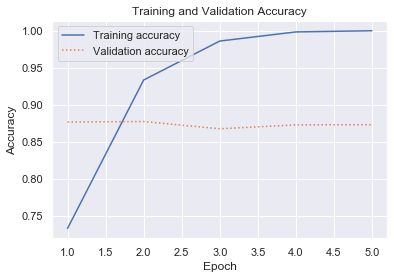

In [20]:
# Visualize the changes in training and validation accuracy as training progress
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Based on the above plot, I would recommend decreasing the number of training epochs to 2, as it gives the smallest discrepancy between the Training accuracy and the Validation accuracy.

Another way to check for overfitting is to compare training loss to validation loss as training proceeds. Optimization problems such as this seek to minimize a **Loss function** (also known as Cost Function). For a given epoch, training loss, much greater than validation loss, can be evidence of overfitting. In the previous step, you used the acc and val_acc properties of the history object's history property to plot training and validation accuracy. The same property also contains values named loss and val_loss representing training and validation loss, respectively

[]

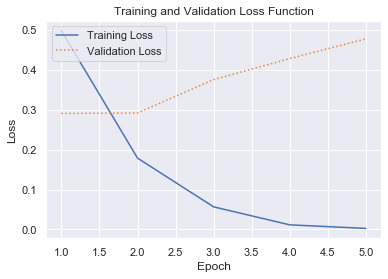

In [21]:
# Visualize the changes in training and validation Loss (or Cost) Function as training progress
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

In [17]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.30%


An accuracy between 85% and 90% is acceptable considering that we built the model from scratch (as opposed to using a pretrained neural network) and the training time was short even without a GPU. It is possible to achieve accuracies of 95% or higher with alternate neural network architectures, particularly recurrent neural networks (RNNs) that utilize Long Short-Term Memory (LSTM) layers. Keras makes it easy to build such networks, but training time can increase exponentially. The model that you built strikes a reasonable balance between accuracy and training time. However, if you would like to learn more about building RNNs with Keras, see Understanding LSTM and its Quick Implementation in Keras for Sentiment Analysis, available at...

https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47

## Using the model

Here we write a Python function that accepts a text string as input, passes it to the model, and returns a sentiment score. Then you'll use the function to analyze the sentiment expressed in various text strings.

In [23]:
import string
import numpy as np

def analyze(text):
    '''This function accepts a string as input and returns a number from 0.0 to 1.0,
    quantifying the sentiment expressed in that string. 
    
    The higher the number, the more positive the sentiment. 
    
    The function cleans the input string, converts it into a list of integers 
    referencing words in the dictionary created by the load_data function, and 
    finally calls the model's predict function to score the text for sentiment.
    '''
    
    
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [27]:
# Unit Test for a Positive Sentiment text ==> Output number should be > 0.5
result = analyze('Easily the most stellar experience I have ever had.')
if result > 0.5:
    print('TEST PASSED: 0.5 < Sentiment Score =', result)
else:
    print('TEST FAILED, 0.5 > Sentiment Score =', result)

TEST PASSED: 0.5 < Sentiment Score = 0.78710186


In [28]:
# Unit Test for a Negative Sentiment text ==> Output number should be < 0.5
result = analyze('The long lines and poor customer service really turned me off.')
if result < 0.5:
    print('TEST PASSED: 0.5 > Sentiment Score =', result)
else:
    print('TEST FAILED, 0.5 < Sentiment Score =', result)

TEST PASSED: 0.5 > Sentiment Score = 0.028805861
